# 如何做車牌數字辨認?

## 輸入圖片的大小多少比較適當?

請看原始圖檔的大小，與原始圖檔一樣，或是稍大一些些，原始圖檔解析度已經很小了，不要犧牲原始圖片的解析度。


## 數字編碼 要與你的CNN輸出的編碼要搭配
labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z']  #標籤值



## CNN的輸出節點要如何設計?

輸出節點如何設計?節點要與類別數一樣多


## 如何讀入資料集

flow_from_directory()最方便

## 如何切割validation?
資料集只有一整份，沒有切割，我們可以透過validation_split=0.1加以切割驗證資料集

請參看講義:30-30-讀取資料的幾種方式

或是 後面有範例

## 如何預測?對應的數字

np.argmax(prediction)可以取得機率最大的類別數字

## 是否需要影像增強，最好使用，通常可以讓模型強化一般化的能力

影像增強的參數可以小幅度的增強即可。例如旋轉角度、平移幅度較度可以小一些


## 建立以下兩種模型並比較準確度

模型1:純CNN模型

模型2:遷移學習 Resnet50, Xception, InceptionV3, MobileNet

(1)比較兩種模型的val_accuracy，何者比較準確? 

(2)模型大小?

(3)訓練時間

(4)遷移學習可以明顯改善準確度嗎?

(5)其他比較...

# 結果摘要寫在這裡

#以下為CNN的訓練結果

# 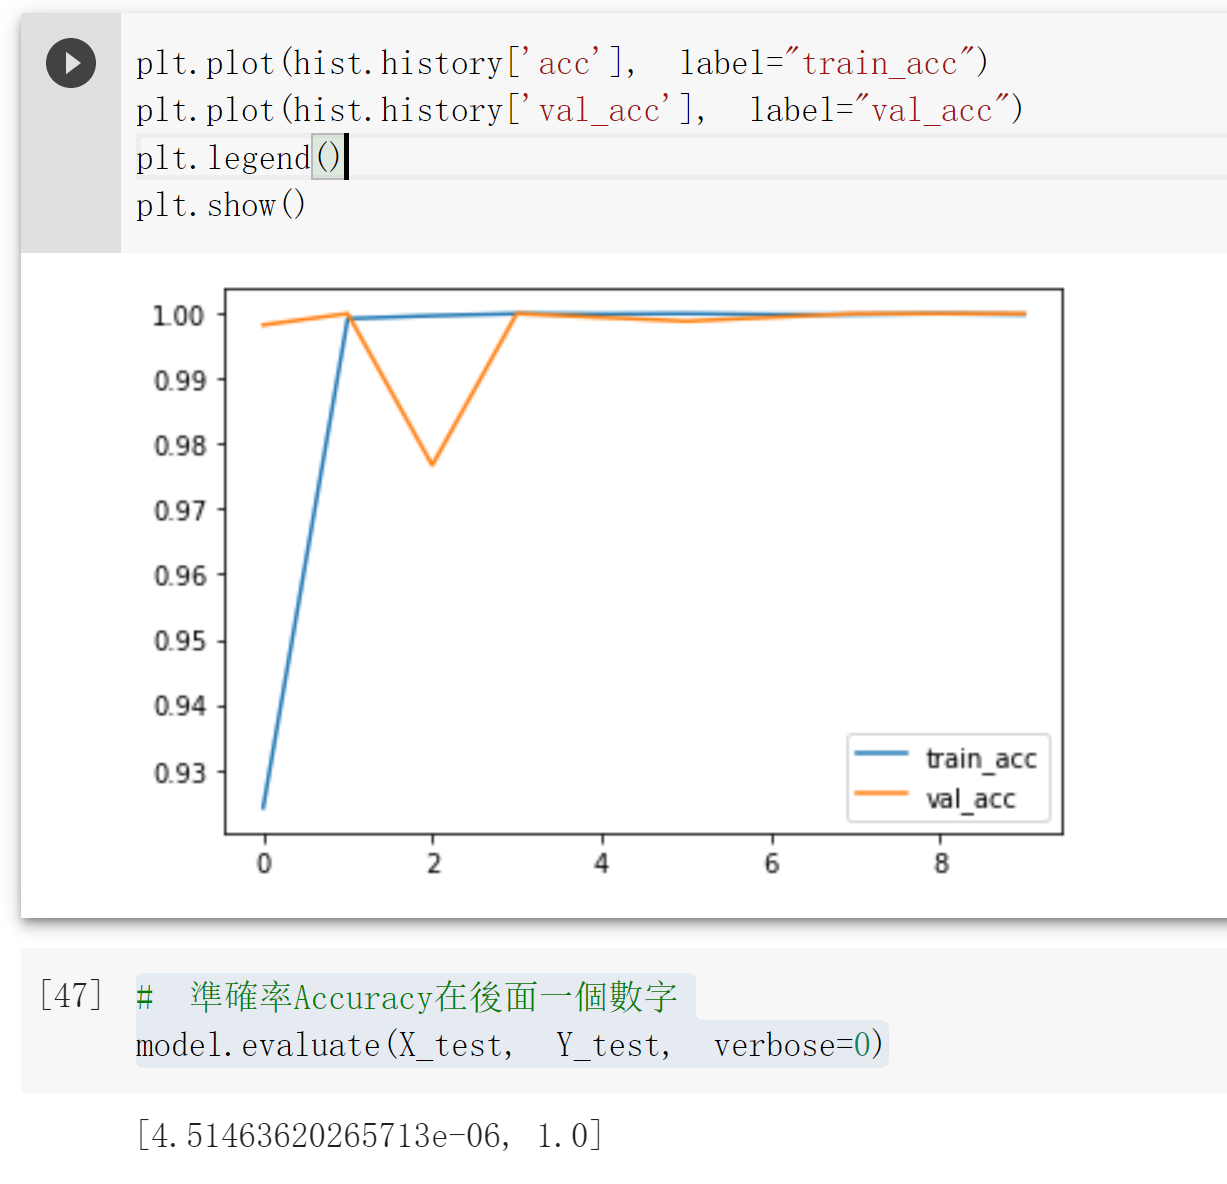

#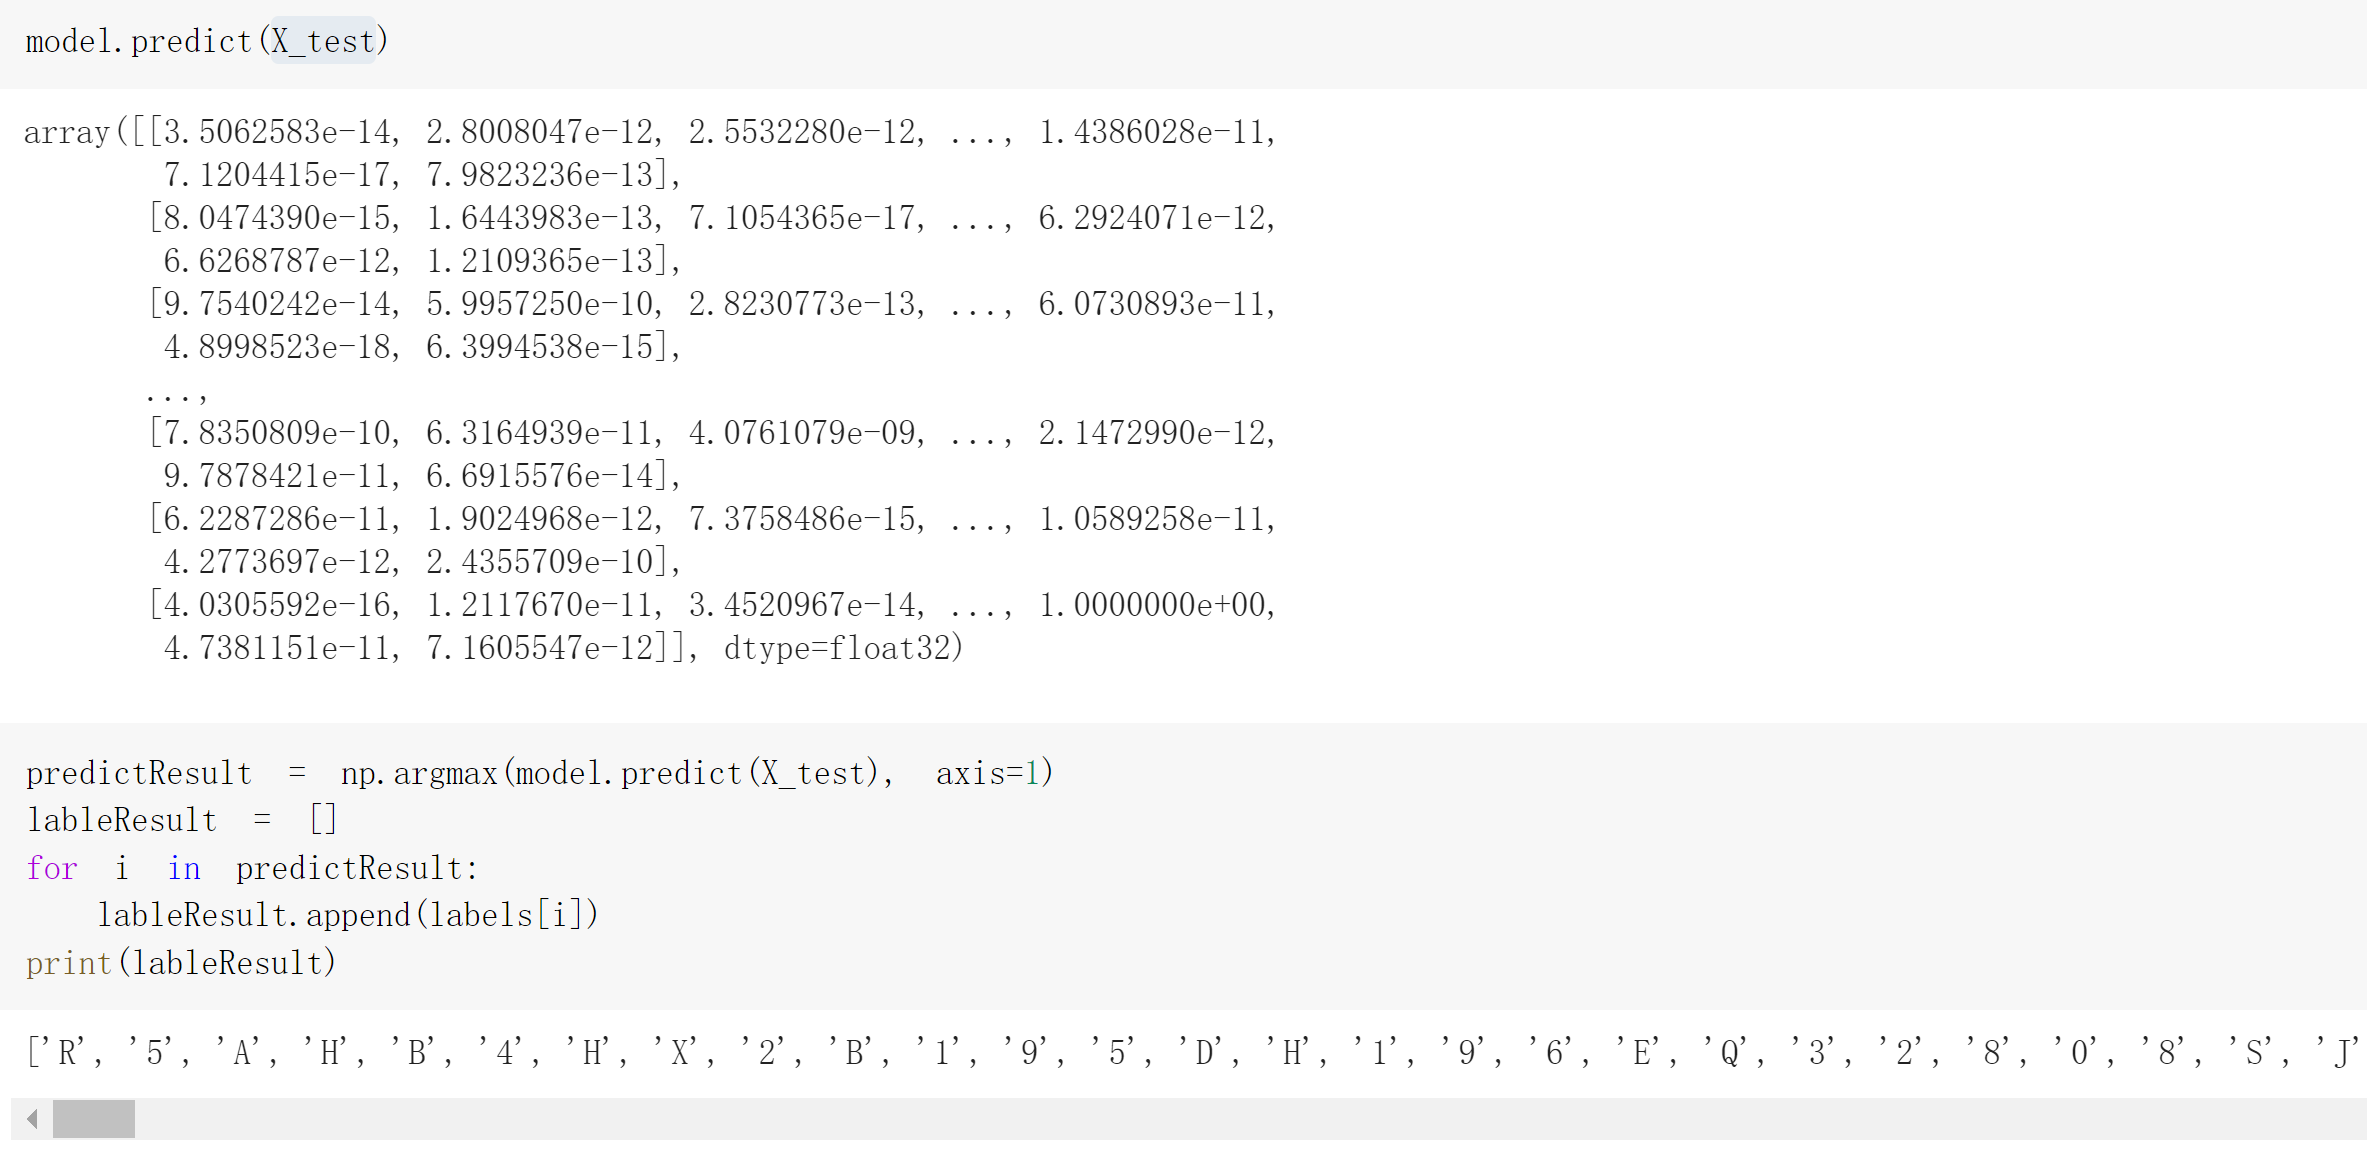

以下為VGG16的訓練結果

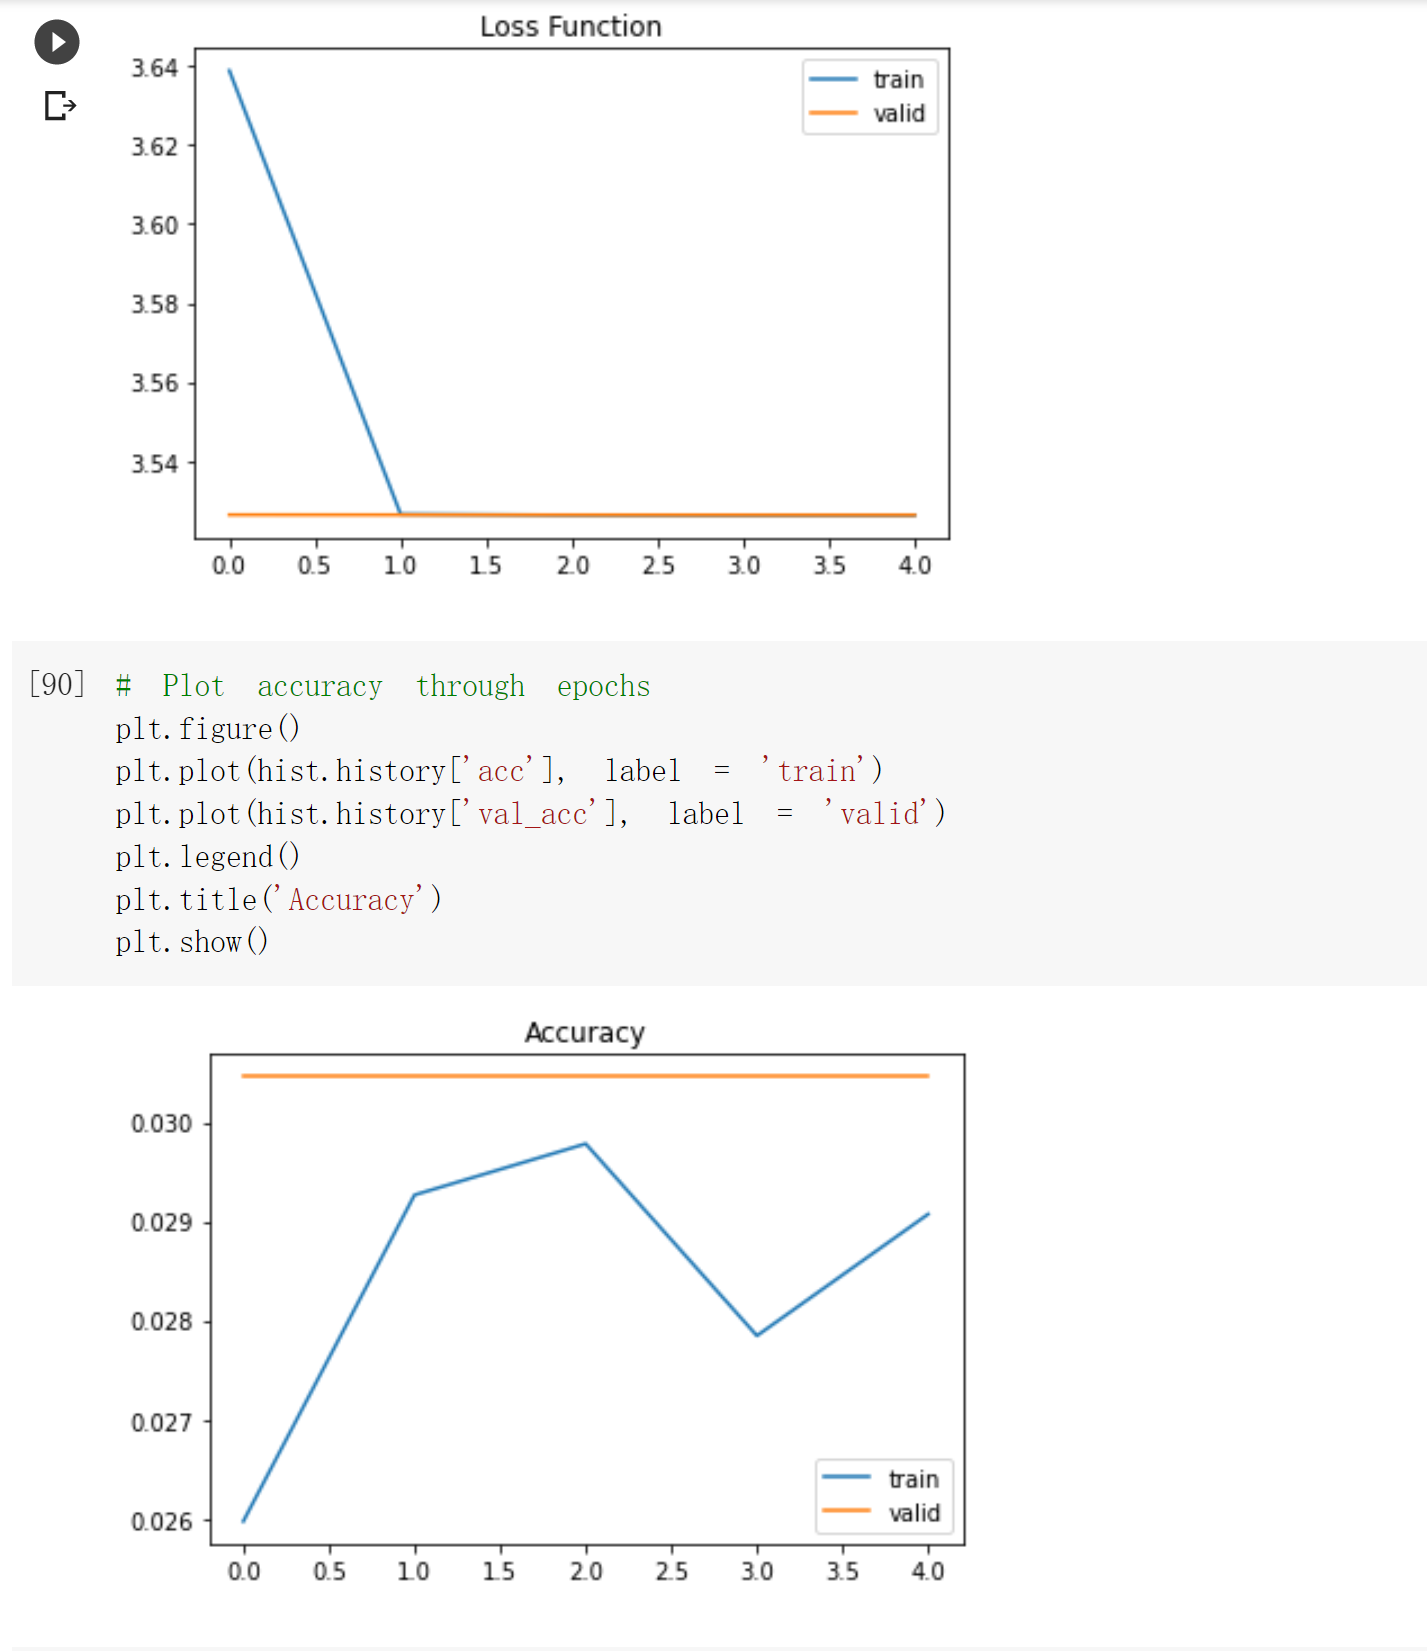

# 你的步驟寫在這裡

自己建CNN時先用了
from modle.preprocess_funs_module import read_data, read_image
這個函式庫來讀取dataset，寬高為20,40
再使用
from sklearn.model_selection import train_test_split
將資料分為X_train, X_test, Y_train, Y_test
之後將4部分的資料進行處理後進行CNN建模
建完模後將資料丟進去訓練
訓練完後確認結果

使用VGG16時
因為VGG16輸入寬高大小最小要36*36
於是改使用了
flow_from_directory
將大小放大為40*80
之後進行VGG16建模，再組合模型將輸出設為34個節點
並進行訓練
訓練完後確認結果

# 資料集只有一整份，沒有切割，我們可以透過validation_split=0.1加以切割驗證資料集

## Training set

In [12]:
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    #rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    validation_split=0.1, # 定義validation的比例
)

# 從哪一個卷夾讀入資料
# 定義讀入圖檔轉換成多少解析度
# 貓狗兩個卷夾有兩類，Label資料格式轉成2個節點輸出:class_mode='categorical' 
train_flow = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH), 
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # training subset
)

Found 20 images belonging to 2 classes.


## Validation set

In [13]:
valid_flow = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH), 
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # validation subset
    )

Found 2 images belonging to 2 classes.


In [14]:
training_data_n = len(train_flow.filenames)
validation_data_n = len(valid_flow.filenames)

print("Training data count : "+str(training_data_n))
print("Validation data count : "+str(validation_data_n))

Training data count : 20
Validation data count : 2
